In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/mtcars.csv"
CarData = pd.read_csv(url)
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


Here is the dictionary of our data: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

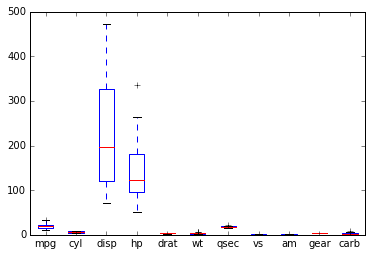

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
CarData.plot(kind = 'box')

In [3]:
Q1_hp = CarData['hp'].quantile(.25)  #Here is first Quartilefor hp
Q3_hp = CarData['hp'].quantile(.75)  #Here is third Quartile for hp
IQR_hp = Q3_hp - Q1_hp  

#### Let's get rid of outliers

In [4]:
CarData.drop(CarData[(CarData['hp'] > Q3_hp + 1.5*IQR_hp) |
                     (CarData['hp'] < Q1_hp - 1.5*IQR_hp) ].index
                        , inplace = True)

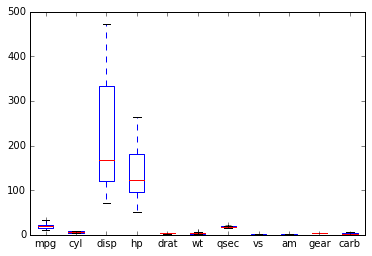

In [5]:
CarData.plot(kind = 'box')

#### Great! We have an outlier free dataset to work with!

## First: Create a correlation matrix and explore it

In [6]:
CarData.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.848252,-0.846203,-0.817454,0.686527,-0.869775,0.394328,0.655638,0.656624,0.567462,-0.575325
cyl,-0.848252,1.000000,0.903260,0.869776,-0.708753,0.785574,-0.571495,-0.805401,-0.586724,-0.594743,0.525530
disp,-0.846203,0.903260,1.000000,0.858715,-0.712171,0.887852,-0.425631,-0.706693,-0.632086,-0.626252,0.414851
hp,-0.817454,0.869776,0.858715,1.000000,-0.507509,0.724729,-0.663887,-0.753395,-0.416755,-0.352362,0.650476
drat,0.686527,-0.708753,-0.712171,-0.507509,1.000000,-0.712847,0.089908,0.442894,0.734561,0.746431,-0.098105
wt,-0.869775,0.785574,0.887852,0.724729,-0.712847,1.000000,-0.162421,-0.552654,-0.725626,-0.640649,0.481195
qsec,0.394328,-0.571495,-0.425631,-0.663887,0.089908,-0.162421,1.000000,0.742908,-0.171390,-0.117663,-0.604178
vs,0.655638,-0.805401,-0.706693,-0.753395,0.442894,-0.552654,0.742908,1.000000,0.210349,0.275662,-0.595944
am,0.656624,-0.586724,-0.632086,-0.416755,0.734561,-0.725626,-0.171390,0.210349,1.000000,0.783700,-0.088148
gear,0.567462,-0.594743,-0.626252,-0.352362,0.746431,-0.640649,-0.117663,0.275662,0.783700,1.000000,0.109379


#### What do we learn from this Corr() Matrix?

Answer: Mpg, Drat, vs, qsec, am, gear are related
cyl, disp, hp, wt, and carb are related


### Let's draw scatter plot and regression plot of Mileage Per Gallon (y) vs horse power (x)

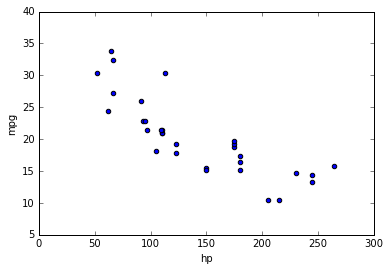

In [9]:
#Scatter plot
CarData.plot(kind="scatter", y="mpg", x="hp")

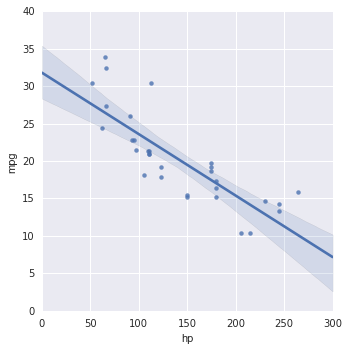

In [13]:
#regression plot
import seaborn as sns
sns.lmplot(data=CarData, y="mpg", x="hp")


#### How do you interpret these graphs?

Answer: High horsepower inversely affects Miles per gallon

#### Now let's find build a regression line. Use hp to predict mpg

In [19]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X = CarData[["hp"]]
y = CarData["mpg"]
linreg.fit(X,y)
print(linreg.intercept_)
print(linreg.coef_)


31.7917856473
[-0.08204757]


#### Write down the formula for your regression line

Answer: MPG = 31.79 + -.08 * HP

#### Interpret the coefficient of hp

Answer: for every additional item of horsepower the miles per gallon drops by .08 miles per gallon

#### Let's make predictions for two cars VW Jetta and Bugatti Veyron . VW jetta has 170 hp and Bugatti Veyron has 1200 hp. What are your predictions for these two cars?

In [21]:
CarData.hp.describe()
print("Jetta mpg: %d" % linreg.predict(170))

Jetta mpg: 17


In [22]:
#We do not have the observations to predict the Bugatti
print("Bugatti mpg: %d" % linreg.predict(1200))

Jetta mpg: -66


Answer: The Jetta has a rate of 17 miles per gallon, Bugatti is undeterminable from these observations

#### Now let's work with categorical data

Let's first create dummy variables for weight of cars. Let's categorize Cars based on weight. Those cars that are heavier than 75% of cars are going to be called "Heavy", those which are heavier than 25% of cars but lighter than the heaviest 25% cars are going to be Called "Medium" and finally, the lightest 25% cars are called "Light".

In [23]:
mask_Heavy = (CarData['wt'] > CarData['wt'].quantile(0.75))
mask_Light = (CarData['wt'] < CarData['wt'].quantile(0.25))
CarData['wt_category'] = 'Medium'
CarData.loc[mask_Heavy,'wt_category'] = 'Heavy'
CarData.loc[mask_Light,'wt_category'] = 'Light'
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_category
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Medium
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Medium
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Light
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Medium
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Medium


In [24]:
WeightDummy = pd.get_dummies(CarData.wt_category)
del WeightDummy['Light']
CarData = pd.concat([CarData,WeightDummy],axis = 1)
CarData.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,wt_category,Heavy,Medium
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Medium,0,1
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Medium,0,1
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Light,0,0
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Medium,0,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Medium,0,1


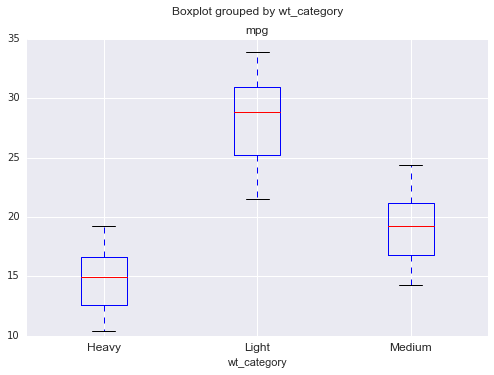

In [25]:
#Now let's visualize association between mpg and weight
CarData.boxplot(column = 'mpg', by = 'wt_category') 

#### Does the abox boxplot make sense? Why it does or why it does not?

Answer: Yes it does, the heaviest cars have a lower mpg than all lighter car.

#### Apply a multivariable regression line to discover relationship between mpg and weight categories. Print your outcomes.

In [27]:
X = CarData[["Heavy", "Medium"]]
y = CarData["mpg"]
linreg.fit(X, y)
print(linreg.intercept_)
print(linreg.coef_)

28.0875
[-13.475       -9.00083333]


#### Write your regression line

Answer: Mpg = 28.0875 + (-13.475 * Heavy) +  (-9.0008 * Medium)


#### Please interpret your above results

Answer: For every 1000 lbs a car weighs more than a light car, there are 13.475 miles per gallon less efficiency for  a heavy car, and there are -9.0008 miles per gallon for a medium car

** Without using perdict function, predict the average mpg of light, heavy and medium cars **

Answer:
28.0875 for A Light car
19.085 for A medium car
14.62 for A Heavy car


** Now let's use predict function to predict mpg for light, heavy and medium cars **

In [36]:
print("light %d" % linreg.predict([0, 0]))
print("heavy %d" % linreg.predict([1, 0]))
print("medium %d" % linreg.predict([0, 1]))

light 28
heavy 14
medium 19


/Users/jcano/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jcano/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/jcano/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.